## Squirrel Maze Q learning on the Stochastic Environment

In [ ]:
# import cv2
import gym as gym
from gym import spaces
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import numpy as np
import optuna

In [ ]:
env = SquirrelPet_stoch()

epsilon = 1.0  # Initial exploration rate
epsilon_min = 0.01  # Minimum exploration rate
gamma = 0.95  # Discount factor
alpha = 0.15  # Learning rate
decay_rate = 0.995  # Epsilon decay rate per episode
total_episodes = 1000 
max_timestamp = 10
qt = np.zeros((env.obs_space.n, env.action_space.n))

rewards_epi = []
epsilon_values = []
steps_per_episode = []
penalties_per_episode = []

final_state = None
for episode in range(total_episodes):
    state, _ = env.reset()
    state_index = env.obs_space_to_index(state)
    total_rewards = 0
    total_steps = 0  
    

    while True:

        if np.random.uniform(0, 1) < epsilon:
            action = env.action_space.sample()
        else:
            action = np.argmax(qt[state_index])
    

        next_state, reward, terminated, truncated, _ = env.step(action)
        total_steps += 1 
        next_strt_idx = env.obs_space_to_index(next_state)
        


        qt[state_index, action] += alpha * (reward + gamma * np.max(qt[next_strt_idx]) - qt[state_index, action])


        state_index = next_strt_idx
        total_rewards += reward
        
        if terminated or truncated:
            break
    
    penalties_per_episode.append(env.get_penalty_count())  
    
    # Q-table for every 100 episodes
    if (episode + 1) % 100 == 0:
        print(f"Episode: {episode + 1}")
        print("Q-table:")
        print(qt)

        # average penalties
        avg_penalty = np.mean(penalties_per_episode[-100:])
        print(f"Average Penalties in Last 100 Episodes: {avg_penalty}")

    epsilon = max(epsilon_min, epsilon * decay_rate)
    epsilon_values.append(epsilon)
    rewards_epi.append(total_rewards)
    steps_per_episode.append(total_steps)

    if (episode + 1) % 100 == 0:
        average_steps = np.mean(steps_per_episode[-100:])
        print(f"Episode: {episode + 1}, Average Steps: {average_steps}")

    if episode == total_episodes - 1:
        final_state = env.state


Requested Action: 3, Chosen Action: 3
Requested Action: 3, Chosen Action: 2
Requested Action: 0, Chosen Action: 0
Requested Action: 3, Chosen Action: 1
Requested Action: 2, Chosen Action: 1
Requested Action: 2, Chosen Action: 1
Requested Action: 0, Chosen Action: 0
Requested Action: 3, Chosen Action: 3
Requested Action: 0, Chosen Action: 0
Requested Action: 2, Chosen Action: 2
Requested Action: 1, Chosen Action: 1
Requested Action: 1, Chosen Action: 2
Requested Action: 2, Chosen Action: 1
Requested Action: 2, Chosen Action: 2
Requested Action: 3, Chosen Action: 3
Requested Action: 3, Chosen Action: 3
Requested Action: 0, Chosen Action: 2
Requested Action: 1, Chosen Action: 1
Requested Action: 0, Chosen Action: 3
Requested Action: 1, Chosen Action: 1
Requested Action: 3, Chosen Action: 3
Requested Action: 3, Chosen Action: 3
Requested Action: 2, Chosen Action: 2
Requested Action: 0, Chosen Action: 3
Requested Action: 2, Chosen Action: 3
Requested Action: 2, Chosen Action: 2
Requested Ac

In [ ]:
# import pickle

# # Assuming qt is your Q-table after training
# qt = ...  # Your trained Q-table here

# # Save the Q-table with pickle
# with open('q_table_sto.pkl', 'wb') as f:
#     pickle.dump(qt, f)

# print("Q-table saved")


- Evaluation results for the Qlearning - Deterministic

- Print the initial and final q-table

In [ ]:
initial_qt = np.zeros((env.obs_space.n, env.action_space.n))
print("Initial Q-table:")
print(initial_qt)

Initial Q-table:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


In [ ]:
print("\nTrained Q-table:")
print(qt)


Trained Q-table:
[[ 4.67383327e+02  4.86968601e+02  5.14345732e+02  4.85109695e+02]
 [ 5.66755548e+02  4.66705148e+02  4.80501664e+02  4.45694536e+02]
 [ 2.79986975e+02  3.46798300e+02  5.40700017e+02  3.96681285e+02]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 4.23638995e+02  3.98737088e+02  5.57867675e+02  3.83497033e+02]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 4.62861303e+02  4.43789817e+02  4.31484606e+02  5.45463356e+02]
 [ 2.04613134e+02  2.50303132e+02  2.53832740e+02  4.90281275e+02]
 [ 2.52452023e+02  4.92381262e+02  2.74275463e+02  2.23077927e+02]
 [ 1.64618498e+02  5.44895603e+02  2.74617567e+02  2.07215521e+02]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 4.84634983e+02  1.29823785e+02  1.19773803e+02  2.04863872e+02]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 8.02764586e+00  4.40814362e+02  1.17614301e+02  9.36204408e+01]
 [ 5.57554098e-01 -1.50000000e+00  4.3085864

- Total Reward / Episode

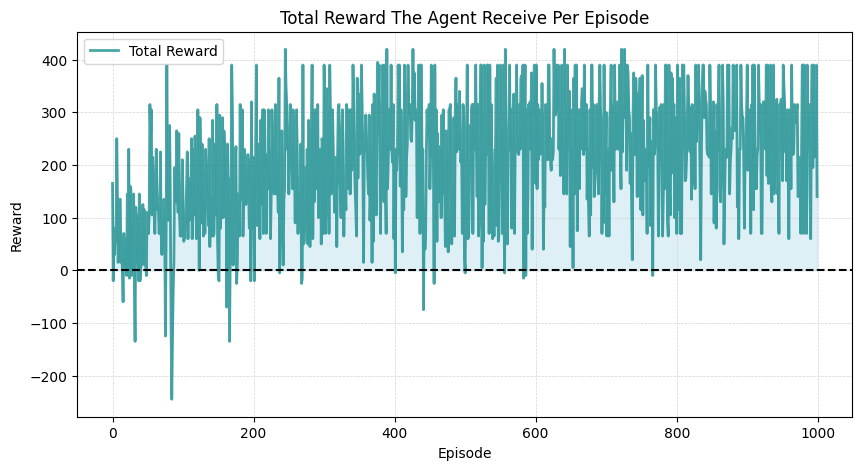

In [ ]:
# total reward per episode graph
plt.figure(figsize=(10, 5))
plt.plot(rewards_epi, color='Teal', linestyle='-', linewidth=2, alpha=0.7, label='Total Reward')
plt.xlabel('Episode')
plt.ylabel('Reward')
plt.title('Total Reward The Agent Receive Per Episode')
plt.grid(True, which='both', linestyle='--', linewidth=0.5, color='lightgray')
plt.fill_between(range(len(rewards_epi)), rewards_epi, color="lightblue", alpha=0.4)
plt.axhline(y=0, color='black', linestyle='--')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()


- Epsilon Decay

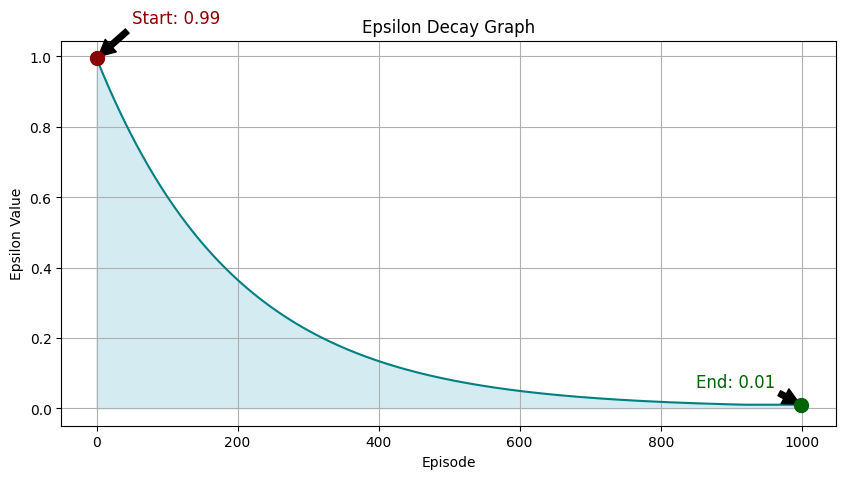

In [ ]:
# epsilon decay graph
plt.figure(figsize=(10, 5))
plt.plot(epsilon_values, color='Teal', label='Decay')
plt.xlabel('Episode')
plt.ylabel('Epsilon Value')
plt.title('Epsilon Decay Graph')

plt.fill_between(range(len(epsilon_values)), epsilon_values, color="lightblue", alpha=0.5)

plt.scatter(0, epsilon_values[0], color='darkred', s=100, zorder=5, label='Start')
plt.scatter(len(epsilon_values)-1, epsilon_values[-1], color='darkgreen', s=100, zorder=5, label='End')

# Annotations
plt.annotate(f'Start: {epsilon_values[0]:.2f}', xy=(0, epsilon_values[0]), xytext=(50, epsilon_values[0]+0.1),
             arrowprops=dict(facecolor='black', shrink=0.05), fontsize=12, color='darkred')
plt.annotate(f'End: {epsilon_values[-1]:.2f}', xy=(len(epsilon_values)-1, epsilon_values[-1]), xytext=(len(epsilon_values)-150, epsilon_values[-1]+0.05),
             arrowprops=dict(facecolor='black', shrink=0.05), fontsize=12, color='darkgreen')



plt.grid(True)
plt.show()

-  environment for at 10 episodes, where the agent chooses only greedy actions from the learned policy. 

In [ ]:
greedy_rewards = []
for _ in range(10):
    total_reward = 0
    state, _ = env.reset()
    state_index = env.obs_space_to_index(state)

    while True:
        action = np.argmax(qt[state_index])
        next_state, reward, terminated, truncated, _ = env.step(action)
        next_strt_idx = env.obs_space_to_index(next_state)
        total_reward += reward
        state_index = next_strt_idx
        if terminated or truncated:
            print(f"Episode {episode + 1} Reward: {round(total_reward, 4)}")
            break

    greedy_rewards.append(total_reward)



Requested Action: 2, Chosen Action: 2
Requested Action: 0, Chosen Action: 2
Requested Action: 2, Chosen Action: 2
Requested Action: 2, Chosen Action: 2
Requested Action: 2, Chosen Action: 2
Requested Action: 2, Chosen Action: 2
Requested Action: 2, Chosen Action: 2
Requested Action: 2, Chosen Action: 2
Requested Action: 2, Chosen Action: 2
Requested Action: 2, Chosen Action: 0
Episode 1000 Reward: 365
Requested Action: 2, Chosen Action: 2
Requested Action: 0, Chosen Action: 0
Requested Action: 2, Chosen Action: 2
Requested Action: 3, Chosen Action: 3
Requested Action: 2, Chosen Action: 2
Requested Action: 3, Chosen Action: 3
Requested Action: 2, Chosen Action: 0
Requested Action: 1, Chosen Action: 1
Requested Action: 2, Chosen Action: 2
Requested Action: 3, Chosen Action: 3
Episode 1000 Reward: 390
Requested Action: 2, Chosen Action: 3
Requested Action: 2, Chosen Action: 2
Requested Action: 0, Chosen Action: 3
Requested Action: 2, Chosen Action: 2
Requested Action: 0, Chosen Action: 1


- Include a plot of the total reward per episode for the greedy actions above!.

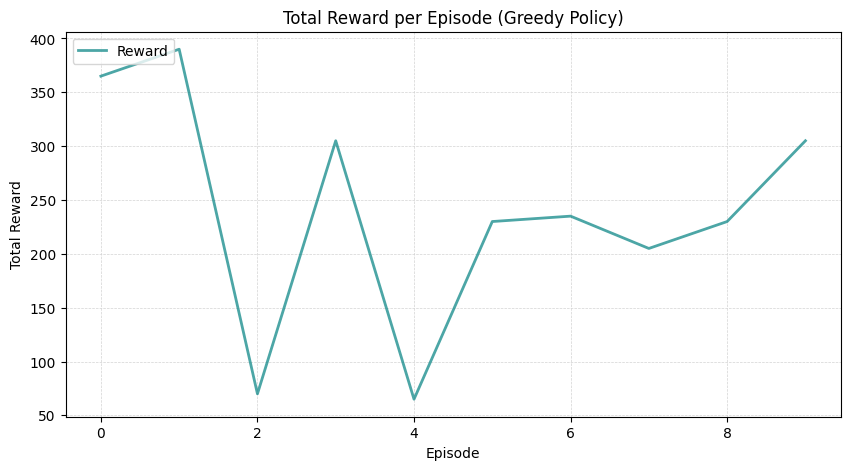

In [ ]:
# total rewards for 10 episodes
plt.figure(figsize=(10, 5))
plt.plot(greedy_rewards, color='Teal', linestyle='-', linewidth=2, alpha=0.7, label='Reward')
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.title('Total Reward per Episode (Greedy Policy)')

plt.grid(True, which='both', linestyle='--', linewidth=0.5, color='lightgray')

plt.legend(loc='upper left')
plt.grid(True)
plt.show()





Hyperparameter tuning. Select two hyperparameters to tune to get better results:

- Discount factor (γ)
- Epsilon decay rate
- Epsilon min/max values
- Number of episodes
- Max timesteps



In [ ]:
performance_dict = {}

def training_loop(env, d , max_timestamp):
    

    epsilon = 1.0  # Initial exploration rate
    epsilon_min = 0.01  # Minimum exploration rate
    gamma = 0.95  # Discount factor
    alpha = 0.15  # Learning rate
    decay_rate = d  # Epsilon decay rate per episode
    total_episodes = 1000 
    max_timestamp = max_timestamp
    qt = np.zeros((env.obs_space.n, env.action_space.n))

    rewards_epi = []
    epsilon_values = []
    steps_per_episode = []
    penalties_per_episode = []

    final_state = None
    for episode in range(total_episodes):
        state, _ = env.reset()
        state_index = env.obs_space_to_index(state)
        total_rewards = 0
        total_steps = 0  
        

        while True:

            if np.random.uniform(0, 1) < epsilon:
                action = env.action_space.sample()
            else:
                action = np.argmax(qt[state_index])
        

            next_state, reward, terminated, truncated, _ = env.step(action)
            total_steps += 1 
            next_strt_idx = env.obs_space_to_index(next_state)
            


            qt[state_index, action] += alpha * (reward + gamma * np.max(qt[next_strt_idx]) - qt[state_index, action])


            state_index = next_strt_idx
            total_rewards += reward
            
            if terminated or truncated:
                break
        
        penalties_per_episode.append(env.get_penalty_count())  
        

        epsilon = max(epsilon_min, epsilon * decay_rate)
        epsilon_values.append(epsilon)
        rewards_epi.append(total_rewards)
        steps_per_episode.append(total_steps)


        if episode == total_episodes - 1:
            final_state = env.state

    final_reward = np.mean(rewards_epi[-100:]) 
    performance_dict[(alpha, gamma, max_timestamp)] = final_reward
    return qt, rewards_epi, epsilon_values, final_state
        


In [ ]:
def evaluate_loop(env, max_timestamp, decay, qt, rewards_epi, epsilon_values, final_state):
    print(f"Max Timestamp, Decay Rate:  {max_timestamp}, {decay}")

    initial_qt = np.zeros((env.obs_space.n, env.action_space.n))
    print("Initial Q-table:")
    print(initial_qt)
    print("\nTrained Q-table:")
    print(qt)


    # total reward per episode graph
    plt.figure(figsize=(10, 5))
    plt.plot(rewards_epi, color='Teal', linestyle='-', linewidth=2, alpha=0.7, label='Total Reward')
    plt.xlabel('Episode')
    plt.ylabel('Reward')
    plt.title('Total Reward The Agent Receive Per Episode')
    plt.grid(True, which='both', linestyle='--', linewidth=0.5, color='lightgray')
    plt.fill_between(range(len(rewards_epi)), rewards_epi, color="lightblue", alpha=0.4)
    plt.axhline(y=0, color='black', linestyle='--')
    plt.legend(loc='upper left')
    plt.grid(True)
    plt.show()



    # epsilon decay graph
    plt.figure(figsize=(10, 5))
    plt.plot(epsilon_values, color='Teal', label='Decay')
    plt.xlabel('Episode')
    plt.ylabel('Epsilon Value')
    plt.title('Epsilon Decay Graph')

    plt.fill_between(range(len(epsilon_values)), epsilon_values, color="lightblue", alpha=0.5)

    plt.scatter(0, epsilon_values[0], color='darkred', s=100, zorder=5, label='Start')
    plt.scatter(len(epsilon_values)-1, epsilon_values[-1], color='darkgreen', s=100, zorder=5, label='End')

    # Annotations
    plt.annotate(f'Start: {epsilon_values[0]:.2f}', xy=(0, epsilon_values[0]), xytext=(50, epsilon_values[0]+0.1),
                arrowprops=dict(facecolor='black', shrink=0.05), fontsize=12, color='darkred')
    plt.annotate(f'End: {epsilon_values[-1]:.2f}', xy=(len(epsilon_values)-1, epsilon_values[-1]), xytext=(len(epsilon_values)-150, epsilon_values[-1]+0.05),
                arrowprops=dict(facecolor='black', shrink=0.05), fontsize=12, color='darkgreen')
    plt.grid(True)
    plt.show()

    

    greedy_rewards = []
    for _ in range(10):
        total_reward = 0
        state, _ = env.reset()
        state_index = env.obs_space_to_index(state)

        while True:
            action = np.argmax(qt[state_index])
            next_state, reward, terminated, truncated, _ = env.step(action)
            next_strt_idx = env.obs_space_to_index(next_state)
            total_reward += reward
            state_index = next_strt_idx

            if terminated or truncated:
                print(f"Episode {episode + 1} Reward: {round(total_reward, 4)}")
                break

        greedy_rewards.append(total_reward)


        

    # total rewards for 10 episodes
    plt.figure(figsize=(10, 5))
    plt.plot(greedy_rewards, color='Teal', linestyle='-', linewidth=2, alpha=0.7, label='Reward')
    plt.xlabel('Episode')
    plt.ylabel('Total Reward')
    plt.title('Total Reward per Episode (Greedy Policy)')

    plt.grid(True, which='both', linestyle='--', linewidth=0.5, color='lightgray')

    plt.legend(loc='upper left')
    plt.grid(True)
    plt.show()




    env.state = final_state
    env.render()   

Requested Action: 0, Chosen Action: 0
Requested Action: 2, Chosen Action: 2
Requested Action: 1, Chosen Action: 1
Requested Action: 1, Chosen Action: 1
Requested Action: 2, Chosen Action: 2
Requested Action: 1, Chosen Action: 1
Requested Action: 2, Chosen Action: 2
Requested Action: 2, Chosen Action: 3
Requested Action: 3, Chosen Action: 3
Requested Action: 1, Chosen Action: 0
Requested Action: 2, Chosen Action: 2
Requested Action: 2, Chosen Action: 2
Requested Action: 0, Chosen Action: 0
Requested Action: 0, Chosen Action: 0
Requested Action: 2, Chosen Action: 2
Requested Action: 0, Chosen Action: 0
Requested Action: 2, Chosen Action: 3
Requested Action: 2, Chosen Action: 2
Requested Action: 3, Chosen Action: 3
Requested Action: 0, Chosen Action: 0
Requested Action: 3, Chosen Action: 3
Requested Action: 0, Chosen Action: 0
Requested Action: 1, Chosen Action: 3
Requested Action: 0, Chosen Action: 0
Requested Action: 0, Chosen Action: 0
Requested Action: 2, Chosen Action: 2
Requested Ac

Requested Action: 2, Chosen Action: 2
Requested Action: 2, Chosen Action: 2
Requested Action: 2, Chosen Action: 2
Requested Action: 2, Chosen Action: 2
Requested Action: 2, Chosen Action: 2
Requested Action: 2, Chosen Action: 2
Requested Action: 2, Chosen Action: 2
Requested Action: 2, Chosen Action: 3
Requested Action: 2, Chosen Action: 0
Requested Action: 2, Chosen Action: 2
Requested Action: 2, Chosen Action: 2
Requested Action: 2, Chosen Action: 2
Requested Action: 0, Chosen Action: 3
Requested Action: 2, Chosen Action: 3
Requested Action: 2, Chosen Action: 2
Requested Action: 2, Chosen Action: 2
Requested Action: 0, Chosen Action: 0
Requested Action: 0, Chosen Action: 1
Requested Action: 0, Chosen Action: 0
Requested Action: 0, Chosen Action: 1
Requested Action: 2, Chosen Action: 2
Requested Action: 0, Chosen Action: 0
Requested Action: 2, Chosen Action: 2
Requested Action: 2, Chosen Action: 3
Requested Action: 2, Chosen Action: 2
Requested Action: 2, Chosen Action: 1
Requested Ac

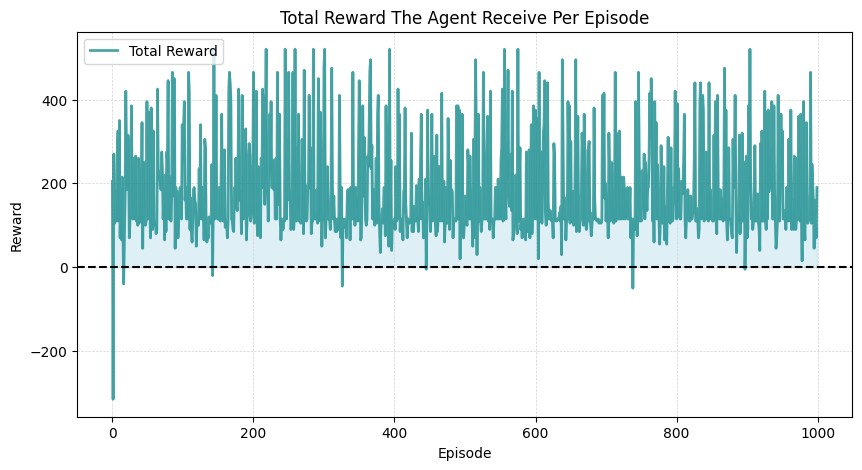

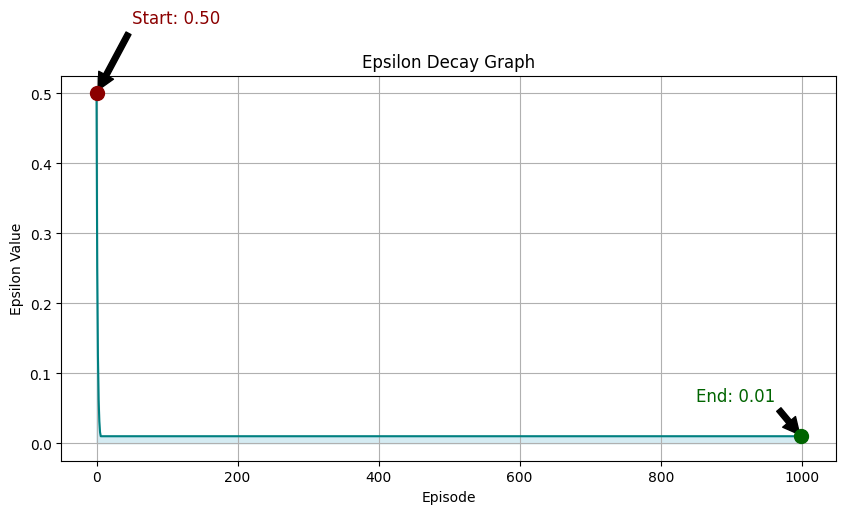

Requested Action: 2, Chosen Action: 2
Requested Action: 0, Chosen Action: 3
Requested Action: 2, Chosen Action: 3
Requested Action: 2, Chosen Action: 2
Requested Action: 0, Chosen Action: 0
Requested Action: 2, Chosen Action: 2
Requested Action: 2, Chosen Action: 3
Requested Action: 2, Chosen Action: 2
Requested Action: 2, Chosen Action: 1
Requested Action: 2, Chosen Action: 2
Requested Action: 2, Chosen Action: 2
Requested Action: 2, Chosen Action: 3
Episode 1000 Reward: 240
Requested Action: 2, Chosen Action: 1
Requested Action: 2, Chosen Action: 2
Requested Action: 0, Chosen Action: 0
Requested Action: 2, Chosen Action: 1
Requested Action: 0, Chosen Action: 2
Requested Action: 2, Chosen Action: 2
Requested Action: 2, Chosen Action: 2
Requested Action: 2, Chosen Action: 3
Requested Action: 2, Chosen Action: 2
Requested Action: 2, Chosen Action: 2
Requested Action: 2, Chosen Action: 2
Requested Action: 2, Chosen Action: 3
Episode 1000 Reward: 330
Requested Action: 2, Chosen Action: 2


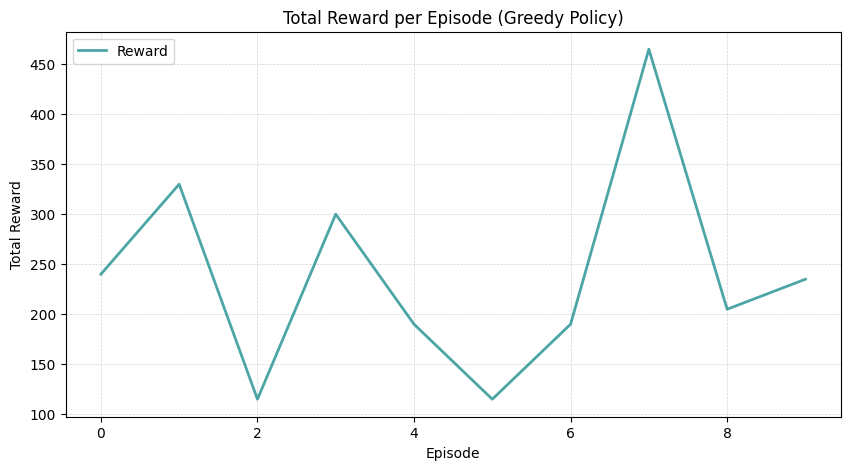

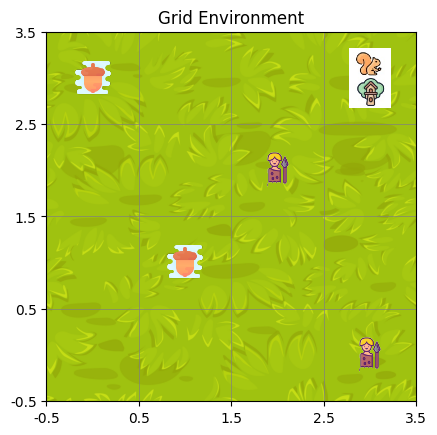

Requested Action: 0, Chosen Action: 0
Requested Action: 2, Chosen Action: 3
Requested Action: 2, Chosen Action: 2
Requested Action: 0, Chosen Action: 3
Requested Action: 3, Chosen Action: 3
Requested Action: 2, Chosen Action: 2
Requested Action: 0, Chosen Action: 0
Requested Action: 3, Chosen Action: 1
Requested Action: 0, Chosen Action: 0
Requested Action: 2, Chosen Action: 2
Requested Action: 2, Chosen Action: 2
Requested Action: 2, Chosen Action: 3
Requested Action: 0, Chosen Action: 0
Requested Action: 2, Chosen Action: 2
Requested Action: 0, Chosen Action: 2
Requested Action: 1, Chosen Action: 2
Requested Action: 1, Chosen Action: 1
Requested Action: 2, Chosen Action: 2
Requested Action: 1, Chosen Action: 1
Requested Action: 2, Chosen Action: 2
Requested Action: 2, Chosen Action: 2
Requested Action: 2, Chosen Action: 2
Requested Action: 0, Chosen Action: 1
Requested Action: 0, Chosen Action: 0
Requested Action: 2, Chosen Action: 3
Requested Action: 1, Chosen Action: 1
Requested Ac

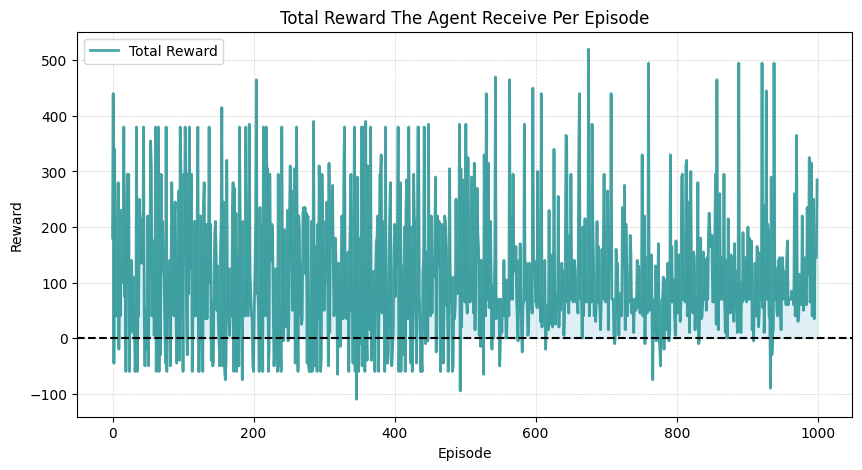

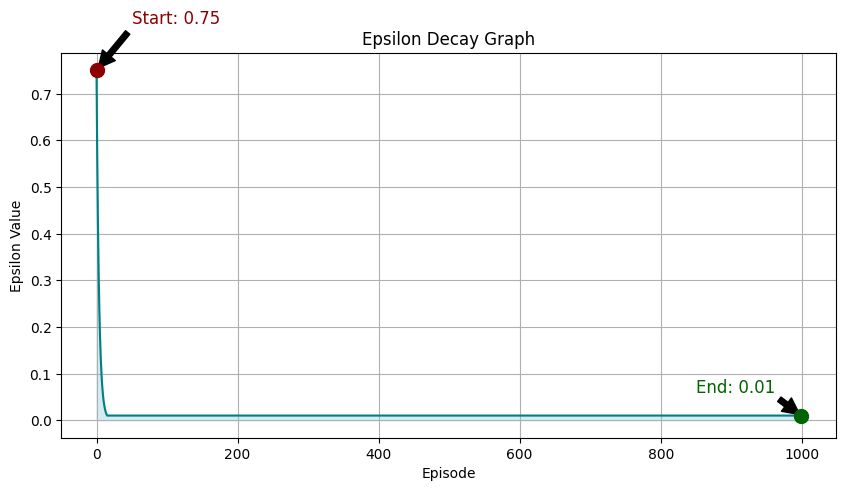

Requested Action: 2, Chosen Action: 2
Requested Action: 0, Chosen Action: 0
Requested Action: 2, Chosen Action: 2
Requested Action: 0, Chosen Action: 0
Requested Action: 2, Chosen Action: 3
Requested Action: 3, Chosen Action: 3
Requested Action: 2, Chosen Action: 2
Requested Action: 3, Chosen Action: 3
Requested Action: 2, Chosen Action: 2
Requested Action: 3, Chosen Action: 0
Requested Action: 1, Chosen Action: 1
Requested Action: 3, Chosen Action: 1
Episode 1000 Reward: 140
Requested Action: 2, Chosen Action: 2
Requested Action: 0, Chosen Action: 0
Requested Action: 2, Chosen Action: 2
Requested Action: 0, Chosen Action: 3
Requested Action: 2, Chosen Action: 2
Requested Action: 0, Chosen Action: 0
Requested Action: 2, Chosen Action: 2
Requested Action: 0, Chosen Action: 0
Episode 1000 Reward: 145
Requested Action: 2, Chosen Action: 2
Requested Action: 0, Chosen Action: 0
Requested Action: 2, Chosen Action: 2
Requested Action: 0, Chosen Action: 0
Requested Action: 2, Chosen Action: 2


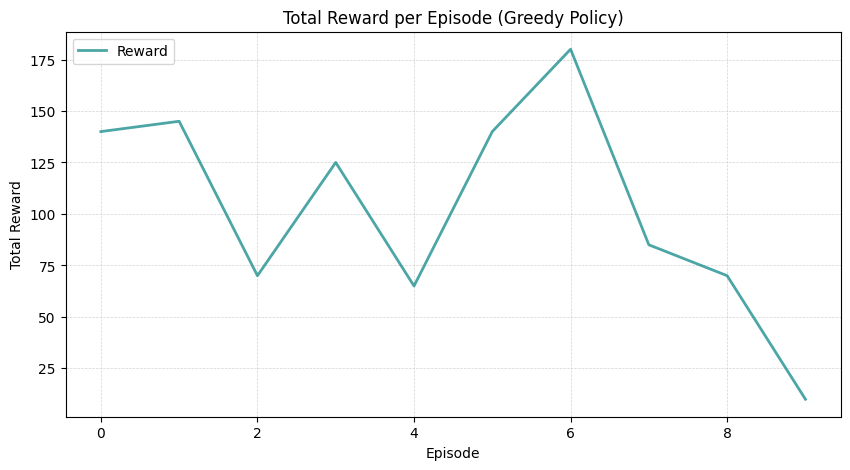

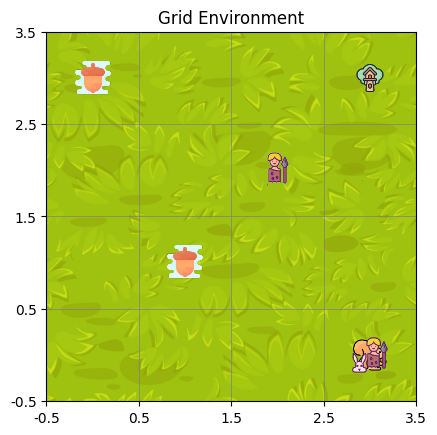

Requested Action: 3, Chosen Action: 2
Requested Action: 0, Chosen Action: 0
Requested Action: 1, Chosen Action: 1
Requested Action: 0, Chosen Action: 0
Requested Action: 1, Chosen Action: 2
Requested Action: 0, Chosen Action: 2
Requested Action: 1, Chosen Action: 1
Requested Action: 2, Chosen Action: 2
Requested Action: 1, Chosen Action: 1
Requested Action: 3, Chosen Action: 3
Requested Action: 2, Chosen Action: 2
Requested Action: 1, Chosen Action: 1
Requested Action: 1, Chosen Action: 1
Requested Action: 2, Chosen Action: 2
Requested Action: 1, Chosen Action: 1
Requested Action: 0, Chosen Action: 0
Requested Action: 1, Chosen Action: 0
Requested Action: 2, Chosen Action: 2
Requested Action: 2, Chosen Action: 2
Requested Action: 3, Chosen Action: 3
Requested Action: 0, Chosen Action: 3
Requested Action: 3, Chosen Action: 3
Requested Action: 1, Chosen Action: 1
Requested Action: 2, Chosen Action: 0
Requested Action: 3, Chosen Action: 3
Requested Action: 0, Chosen Action: 0
Requested Ac

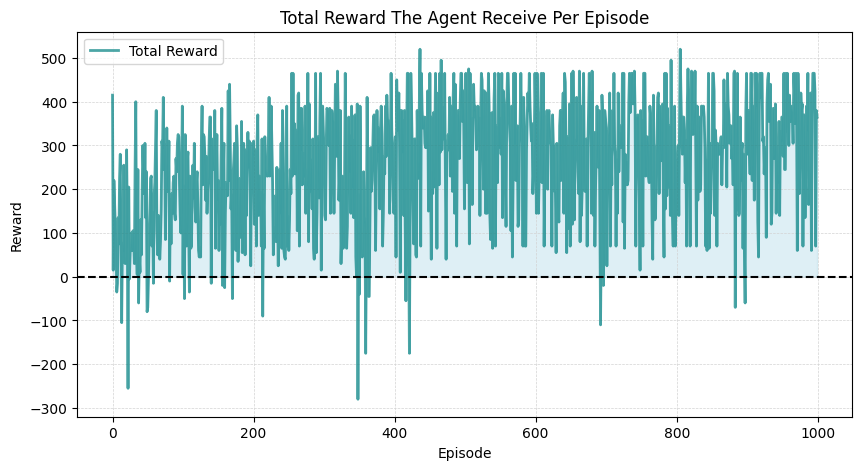

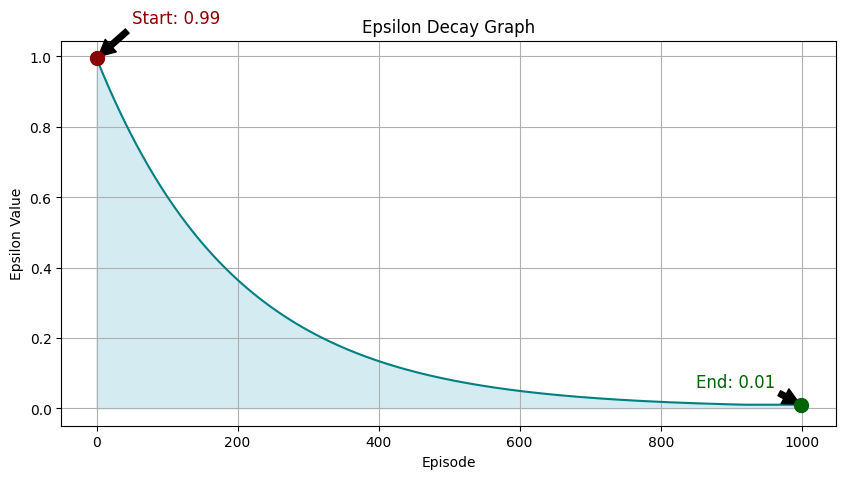

Requested Action: 2, Chosen Action: 3
Requested Action: 2, Chosen Action: 2
Requested Action: 0, Chosen Action: 1
Requested Action: 0, Chosen Action: 1
Requested Action: 0, Chosen Action: 0
Requested Action: 2, Chosen Action: 2
Requested Action: 3, Chosen Action: 3
Requested Action: 2, Chosen Action: 2
Requested Action: 3, Chosen Action: 3
Requested Action: 2, Chosen Action: 3
Requested Action: 2, Chosen Action: 2
Requested Action: 2, Chosen Action: 1
Episode 1000 Reward: 295
Requested Action: 2, Chosen Action: 0
Requested Action: 2, Chosen Action: 2
Requested Action: 2, Chosen Action: 2
Requested Action: 3, Chosen Action: 3
Requested Action: 2, Chosen Action: 2
Requested Action: 3, Chosen Action: 3
Requested Action: 2, Chosen Action: 2
Requested Action: 3, Chosen Action: 1
Requested Action: 2, Chosen Action: 0
Requested Action: 3, Chosen Action: 3
Requested Action: 2, Chosen Action: 2
Requested Action: 3, Chosen Action: 3
Episode 1000 Reward: 390
Requested Action: 2, Chosen Action: 3


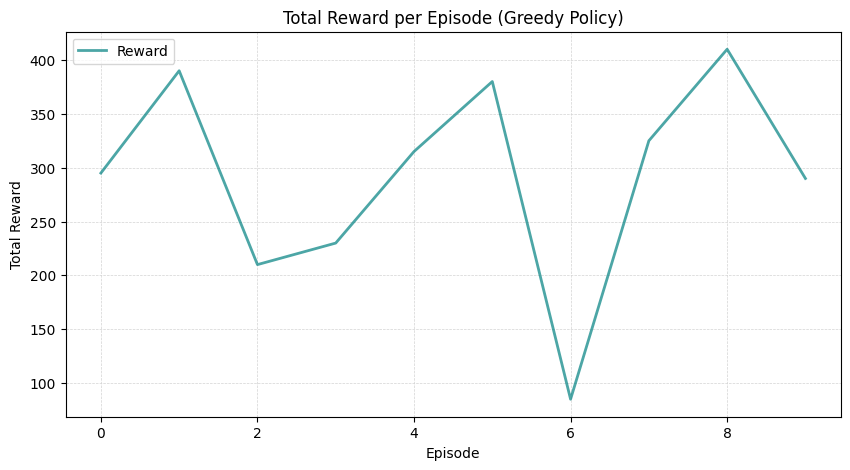

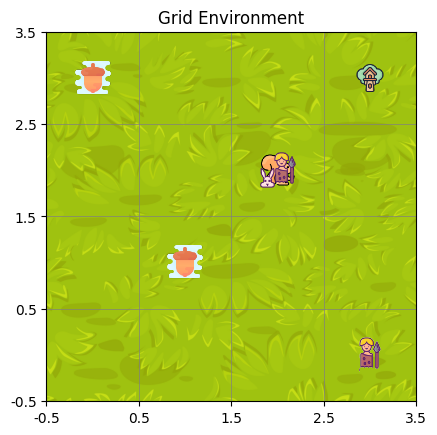

Requested Action: 0, Chosen Action: 0
Requested Action: 2, Chosen Action: 2
Requested Action: 0, Chosen Action: 1
Requested Action: 1, Chosen Action: 0
Requested Action: 1, Chosen Action: 2
Requested Action: 0, Chosen Action: 2
Requested Action: 0, Chosen Action: 0
Requested Action: 3, Chosen Action: 3
Requested Action: 2, Chosen Action: 1
Requested Action: 3, Chosen Action: 3
Requested Action: 3, Chosen Action: 2
Requested Action: 1, Chosen Action: 1
Requested Action: 2, Chosen Action: 2
Requested Action: 3, Chosen Action: 0
Requested Action: 3, Chosen Action: 0
Requested Action: 0, Chosen Action: 0
Requested Action: 2, Chosen Action: 1
Requested Action: 0, Chosen Action: 0
Requested Action: 2, Chosen Action: 2
Requested Action: 0, Chosen Action: 0
Requested Action: 0, Chosen Action: 0
Requested Action: 0, Chosen Action: 0
Requested Action: 1, Chosen Action: 1
Requested Action: 0, Chosen Action: 2
Requested Action: 0, Chosen Action: 2
Requested Action: 1, Chosen Action: 1
Requested Ac

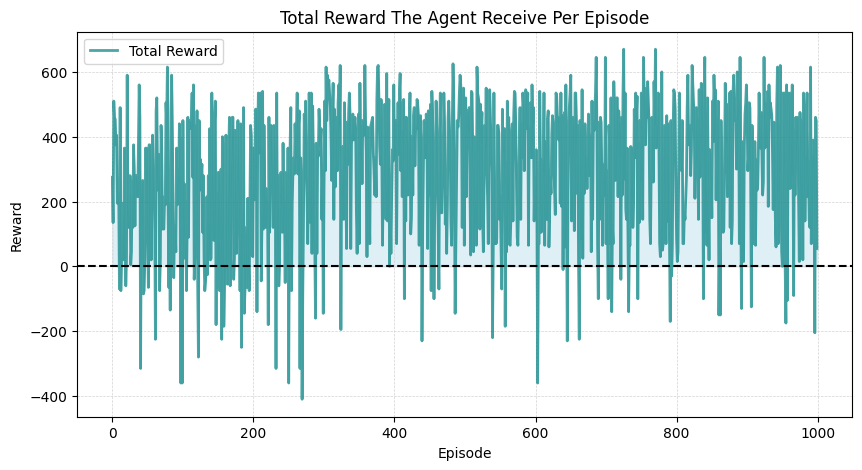

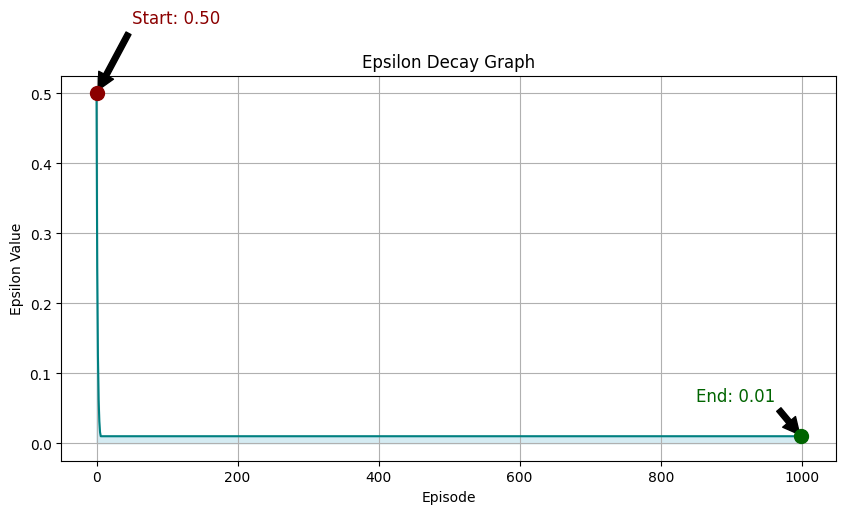

Requested Action: 2, Chosen Action: 0
Requested Action: 2, Chosen Action: 1
Requested Action: 2, Chosen Action: 2
Requested Action: 0, Chosen Action: 0
Requested Action: 2, Chosen Action: 2
Requested Action: 3, Chosen Action: 3
Requested Action: 2, Chosen Action: 2
Requested Action: 3, Chosen Action: 3
Requested Action: 2, Chosen Action: 2
Requested Action: 3, Chosen Action: 3
Requested Action: 2, Chosen Action: 2
Requested Action: 3, Chosen Action: 3
Requested Action: 2, Chosen Action: 2
Requested Action: 3, Chosen Action: 3
Requested Action: 2, Chosen Action: 2
Episode 1000 Reward: 460
Requested Action: 2, Chosen Action: 2
Requested Action: 0, Chosen Action: 2
Requested Action: 2, Chosen Action: 1
Requested Action: 2, Chosen Action: 2
Requested Action: 2, Chosen Action: 3
Requested Action: 2, Chosen Action: 2
Requested Action: 2, Chosen Action: 2
Requested Action: 2, Chosen Action: 2
Requested Action: 2, Chosen Action: 3
Requested Action: 2, Chosen Action: 2
Requested Action: 2, Chos

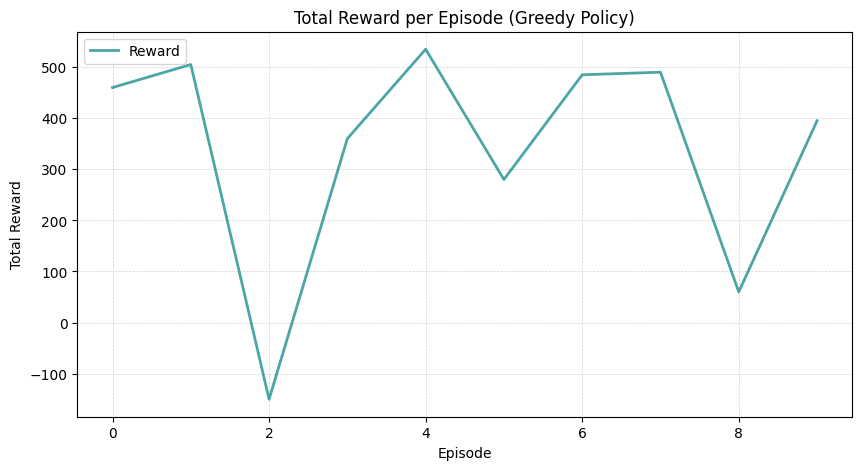

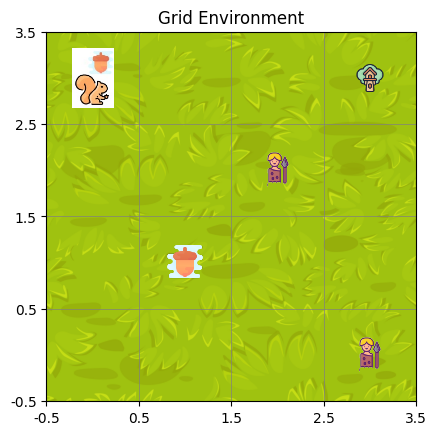

Requested Action: 1, Chosen Action: 1
Requested Action: 3, Chosen Action: 3
Requested Action: 1, Chosen Action: 1
Requested Action: 1, Chosen Action: 1
Requested Action: 1, Chosen Action: 1
Requested Action: 3, Chosen Action: 3
Requested Action: 0, Chosen Action: 0
Requested Action: 0, Chosen Action: 0
Requested Action: 3, Chosen Action: 3
Requested Action: 1, Chosen Action: 1
Requested Action: 1, Chosen Action: 1
Requested Action: 3, Chosen Action: 3
Requested Action: 2, Chosen Action: 1
Requested Action: 2, Chosen Action: 2
Requested Action: 1, Chosen Action: 2
Requested Action: 2, Chosen Action: 2
Requested Action: 2, Chosen Action: 3
Requested Action: 3, Chosen Action: 3
Requested Action: 2, Chosen Action: 2
Requested Action: 1, Chosen Action: 1
Requested Action: 1, Chosen Action: 1
Requested Action: 0, Chosen Action: 3
Requested Action: 3, Chosen Action: 3
Requested Action: 2, Chosen Action: 2
Requested Action: 3, Chosen Action: 3
Requested Action: 0, Chosen Action: 0
Requested Ac

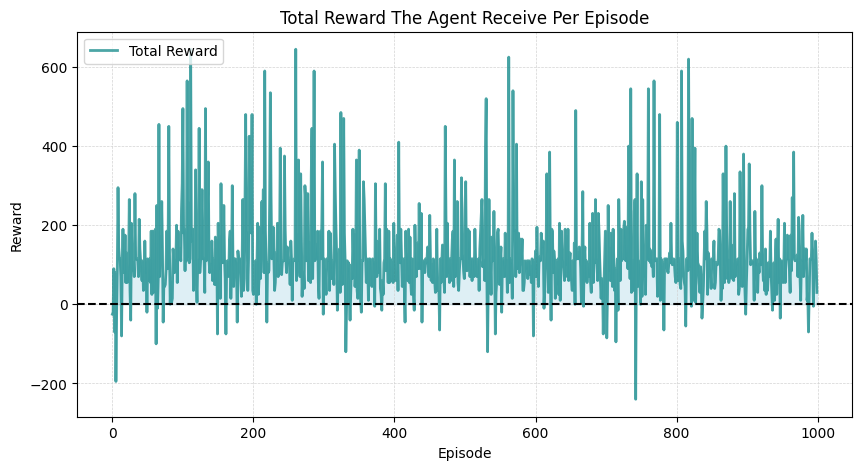

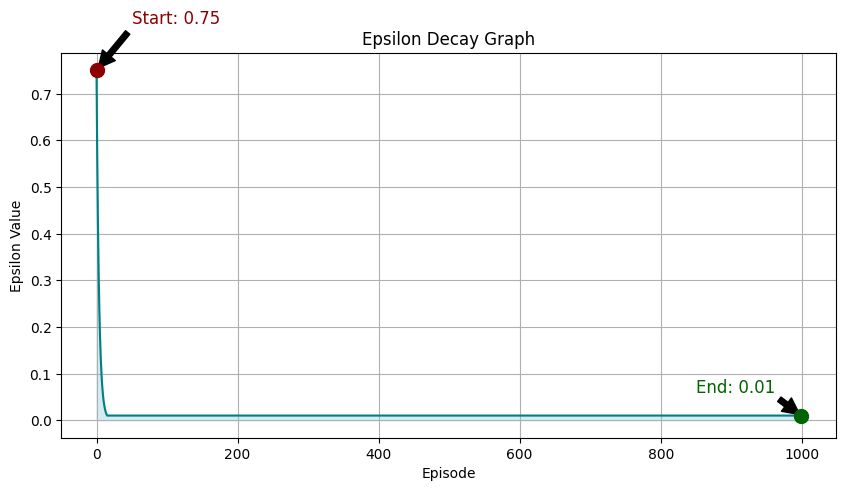

Requested Action: 2, Chosen Action: 0
Requested Action: 0, Chosen Action: 0
Requested Action: 2, Chosen Action: 2
Requested Action: 0, Chosen Action: 3
Requested Action: 2, Chosen Action: 2
Requested Action: 0, Chosen Action: 0
Requested Action: 2, Chosen Action: 2
Requested Action: 1, Chosen Action: 1
Requested Action: 2, Chosen Action: 2
Requested Action: 0, Chosen Action: 0
Episode 1000 Reward: 35
Requested Action: 2, Chosen Action: 2
Requested Action: 0, Chosen Action: 0
Requested Action: 2, Chosen Action: 0
Requested Action: 0, Chosen Action: 0
Requested Action: 2, Chosen Action: 2
Requested Action: 1, Chosen Action: 2
Episode 1000 Reward: 115
Requested Action: 2, Chosen Action: 2
Requested Action: 0, Chosen Action: 1
Requested Action: 0, Chosen Action: 2
Requested Action: 0, Chosen Action: 0
Requested Action: 2, Chosen Action: 2
Requested Action: 0, Chosen Action: 0
Requested Action: 0, Chosen Action: 0
Episode 1000 Reward: 55
Requested Action: 2, Chosen Action: 2
Requested Actio

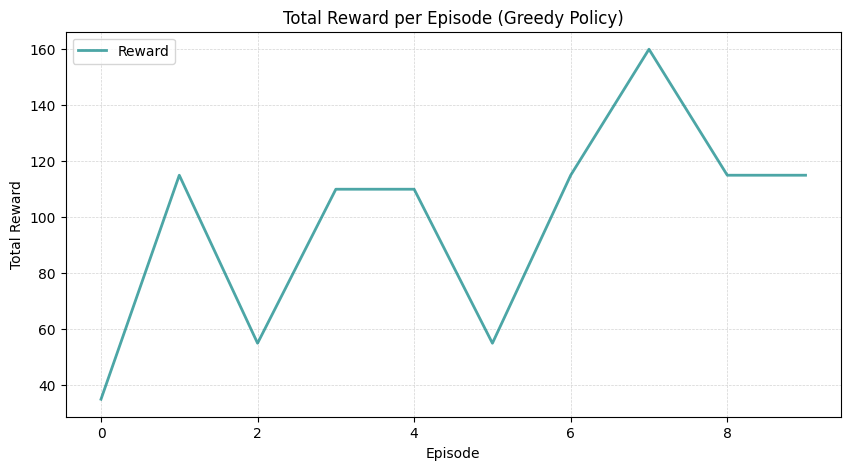

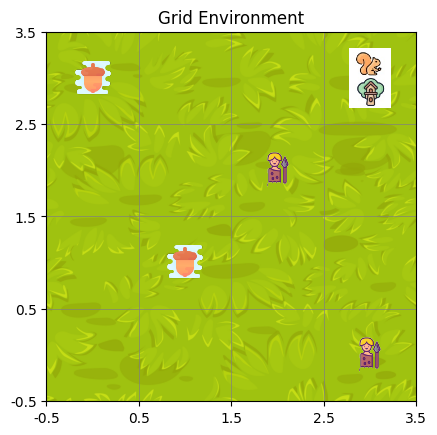

Requested Action: 0, Chosen Action: 0
Requested Action: 0, Chosen Action: 0
Requested Action: 1, Chosen Action: 1
Requested Action: 3, Chosen Action: 3
Requested Action: 3, Chosen Action: 3
Requested Action: 1, Chosen Action: 1
Requested Action: 1, Chosen Action: 1
Requested Action: 1, Chosen Action: 1
Requested Action: 2, Chosen Action: 2
Requested Action: 1, Chosen Action: 3
Requested Action: 2, Chosen Action: 2
Requested Action: 0, Chosen Action: 0
Requested Action: 0, Chosen Action: 0
Requested Action: 3, Chosen Action: 3
Requested Action: 0, Chosen Action: 0
Requested Action: 1, Chosen Action: 1
Requested Action: 2, Chosen Action: 2
Requested Action: 0, Chosen Action: 0
Requested Action: 0, Chosen Action: 0
Requested Action: 1, Chosen Action: 1
Requested Action: 0, Chosen Action: 0
Requested Action: 3, Chosen Action: 1
Requested Action: 3, Chosen Action: 3
Requested Action: 1, Chosen Action: 1
Requested Action: 2, Chosen Action: 2
Requested Action: 3, Chosen Action: 0
Requested Ac

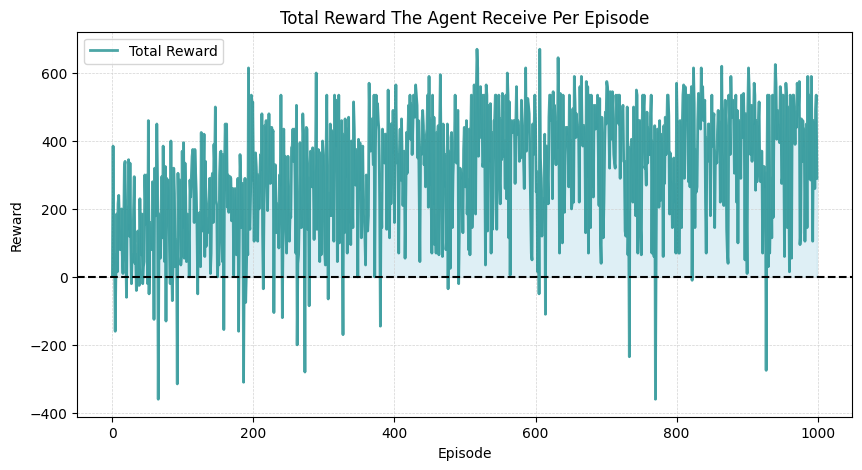

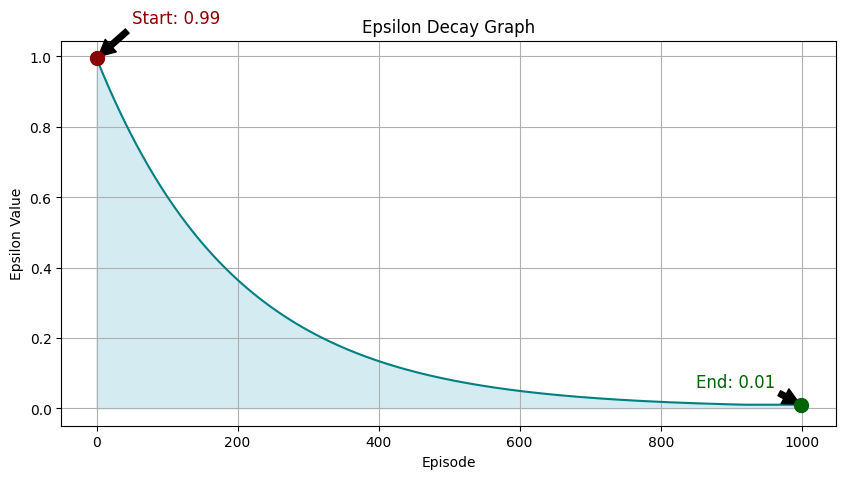

Requested Action: 2, Chosen Action: 0
Requested Action: 2, Chosen Action: 2
Requested Action: 2, Chosen Action: 2
Requested Action: 3, Chosen Action: 3
Requested Action: 2, Chosen Action: 2
Requested Action: 3, Chosen Action: 3
Requested Action: 2, Chosen Action: 2
Requested Action: 3, Chosen Action: 3
Requested Action: 2, Chosen Action: 0
Requested Action: 1, Chosen Action: 1
Requested Action: 2, Chosen Action: 2
Requested Action: 3, Chosen Action: 3
Requested Action: 2, Chosen Action: 1
Requested Action: 0, Chosen Action: 0
Requested Action: 2, Chosen Action: 3
Episode 1000 Reward: 535
Requested Action: 2, Chosen Action: 2
Requested Action: 0, Chosen Action: 0
Requested Action: 2, Chosen Action: 1
Requested Action: 0, Chosen Action: 0
Requested Action: 2, Chosen Action: 2
Requested Action: 3, Chosen Action: 2
Requested Action: 1, Chosen Action: 2
Requested Action: 1, Chosen Action: 1
Requested Action: 2, Chosen Action: 2
Requested Action: 2, Chosen Action: 2
Requested Action: 2, Chos

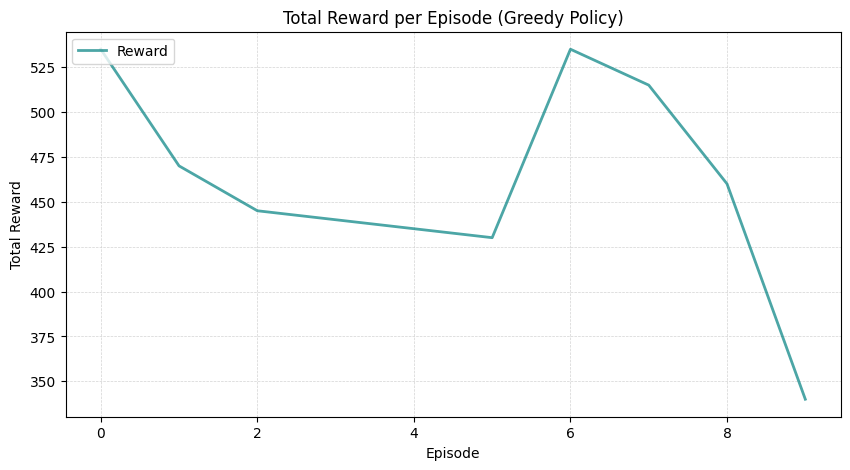

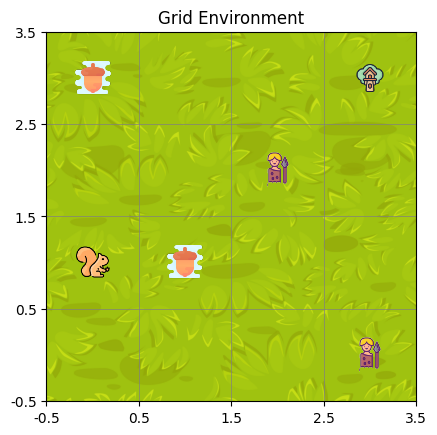

Requested Action: 0, Chosen Action: 0
Requested Action: 3, Chosen Action: 3
Requested Action: 1, Chosen Action: 3
Requested Action: 3, Chosen Action: 3
Requested Action: 3, Chosen Action: 3
Requested Action: 1, Chosen Action: 1
Requested Action: 0, Chosen Action: 1
Requested Action: 2, Chosen Action: 2
Requested Action: 1, Chosen Action: 3
Requested Action: 1, Chosen Action: 1
Requested Action: 1, Chosen Action: 1
Requested Action: 2, Chosen Action: 3
Requested Action: 3, Chosen Action: 3
Requested Action: 0, Chosen Action: 0
Requested Action: 3, Chosen Action: 3
Requested Action: 2, Chosen Action: 2
Requested Action: 3, Chosen Action: 3
Requested Action: 1, Chosen Action: 1
Requested Action: 3, Chosen Action: 3
Requested Action: 1, Chosen Action: 2
Requested Action: 0, Chosen Action: 2
Requested Action: 0, Chosen Action: 3
Requested Action: 0, Chosen Action: 0
Requested Action: 2, Chosen Action: 2
Requested Action: 3, Chosen Action: 3
Requested Action: 2, Chosen Action: 2
Requested Ac

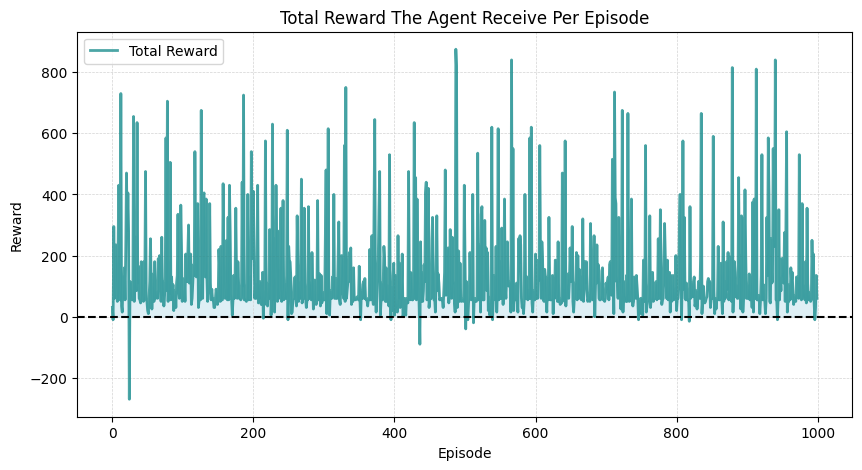

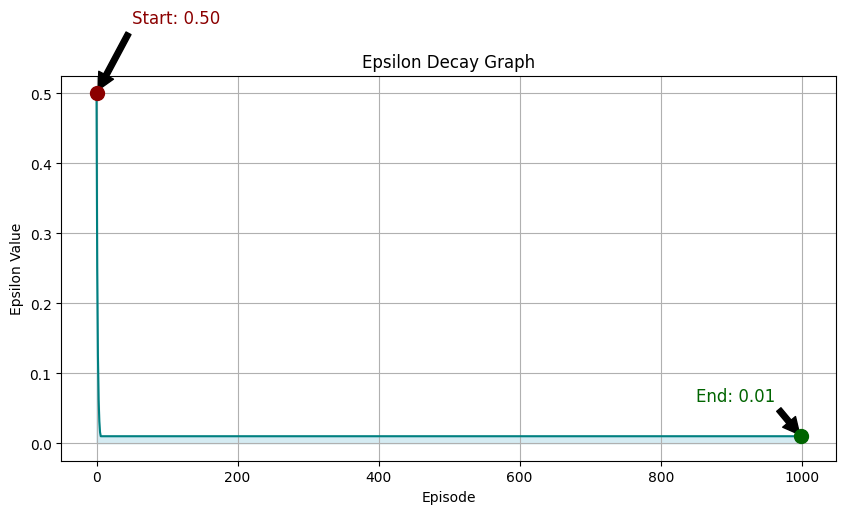

Requested Action: 2, Chosen Action: 1
Requested Action: 2, Chosen Action: 3
Requested Action: 2, Chosen Action: 2
Requested Action: 2, Chosen Action: 2
Requested Action: 0, Chosen Action: 0
Requested Action: 2, Chosen Action: 2
Requested Action: 0, Chosen Action: 2
Requested Action: 0, Chosen Action: 2
Requested Action: 0, Chosen Action: 0
Requested Action: 0, Chosen Action: 0
Episode 1000 Reward: 40
Requested Action: 2, Chosen Action: 2
Requested Action: 2, Chosen Action: 2
Requested Action: 0, Chosen Action: 0
Requested Action: 2, Chosen Action: 0
Requested Action: 2, Chosen Action: 3
Requested Action: 1, Chosen Action: 1
Requested Action: 2, Chosen Action: 0
Requested Action: 1, Chosen Action: 1
Requested Action: 2, Chosen Action: 2
Requested Action: 2, Chosen Action: 2
Requested Action: 0, Chosen Action: 1
Requested Action: 2, Chosen Action: 2
Requested Action: 2, Chosen Action: 0
Requested Action: 0, Chosen Action: 0
Requested Action: 0, Chosen Action: 0
Episode 1000 Reward: 280
R

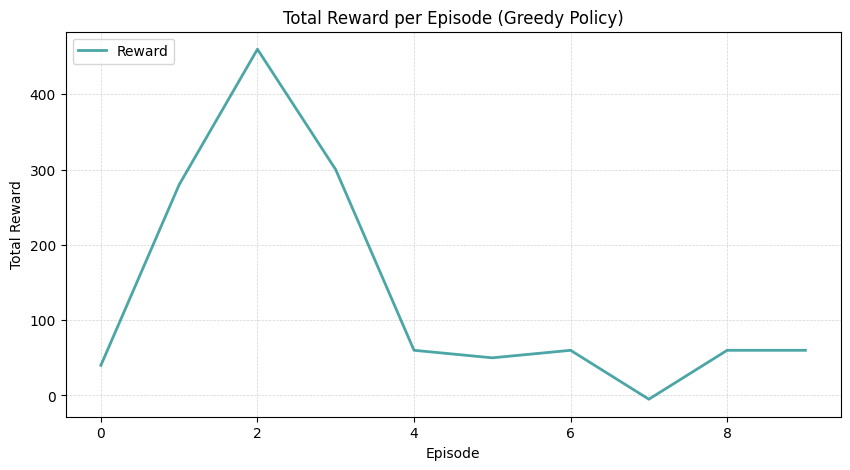

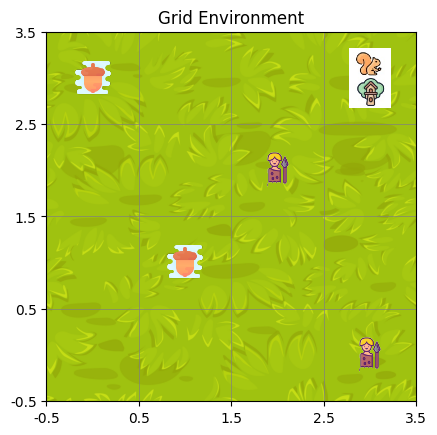

Requested Action: 3, Chosen Action: 3
Requested Action: 0, Chosen Action: 0
Requested Action: 0, Chosen Action: 2
Requested Action: 2, Chosen Action: 2
Requested Action: 2, Chosen Action: 1
Requested Action: 3, Chosen Action: 3
Requested Action: 0, Chosen Action: 0
Requested Action: 2, Chosen Action: 2
Requested Action: 0, Chosen Action: 0
Requested Action: 2, Chosen Action: 2
Requested Action: 1, Chosen Action: 1
Requested Action: 3, Chosen Action: 3
Requested Action: 1, Chosen Action: 2
Requested Action: 3, Chosen Action: 3
Requested Action: 2, Chosen Action: 2
Requested Action: 2, Chosen Action: 2
Requested Action: 0, Chosen Action: 0
Requested Action: 1, Chosen Action: 1
Requested Action: 0, Chosen Action: 1
Requested Action: 0, Chosen Action: 0
Requested Action: 0, Chosen Action: 0
Requested Action: 0, Chosen Action: 2
Requested Action: 0, Chosen Action: 0
Requested Action: 0, Chosen Action: 3
Requested Action: 1, Chosen Action: 1
Requested Action: 2, Chosen Action: 0
Requested Ac

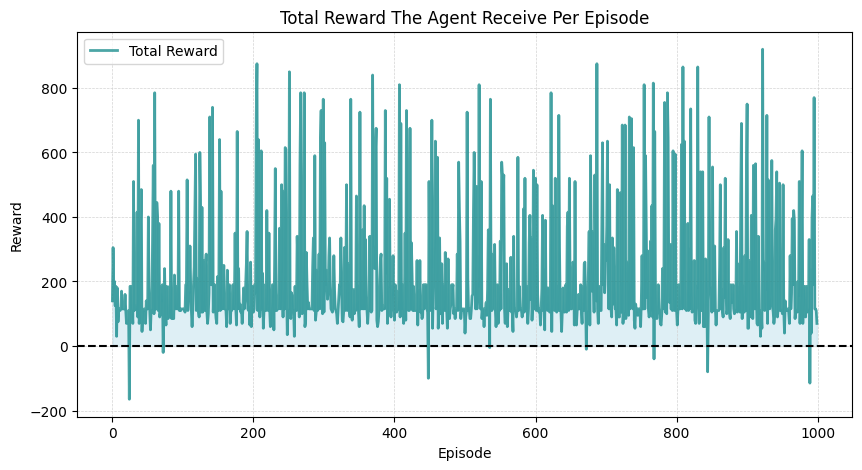

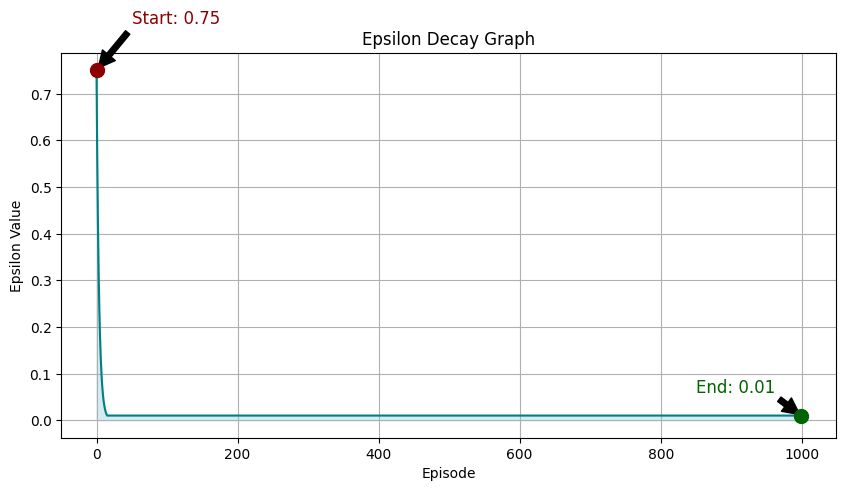

Requested Action: 2, Chosen Action: 2
Requested Action: 0, Chosen Action: 0
Requested Action: 2, Chosen Action: 2
Requested Action: 2, Chosen Action: 2
Requested Action: 0, Chosen Action: 3
Requested Action: 2, Chosen Action: 2
Requested Action: 0, Chosen Action: 0
Requested Action: 0, Chosen Action: 2
Requested Action: 0, Chosen Action: 2
Requested Action: 0, Chosen Action: 0
Episode 1000 Reward: 105
Requested Action: 2, Chosen Action: 2
Requested Action: 0, Chosen Action: 0
Requested Action: 2, Chosen Action: 2
Requested Action: 2, Chosen Action: 0
Requested Action: 2, Chosen Action: 2
Requested Action: 0, Chosen Action: 0
Episode 1000 Reward: 70
Requested Action: 2, Chosen Action: 2
Requested Action: 0, Chosen Action: 1
Requested Action: 0, Chosen Action: 0
Requested Action: 2, Chosen Action: 2
Requested Action: 2, Chosen Action: 2
Requested Action: 0, Chosen Action: 0
Requested Action: 0, Chosen Action: 0
Episode 1000 Reward: 110
Requested Action: 2, Chosen Action: 2
Requested Acti

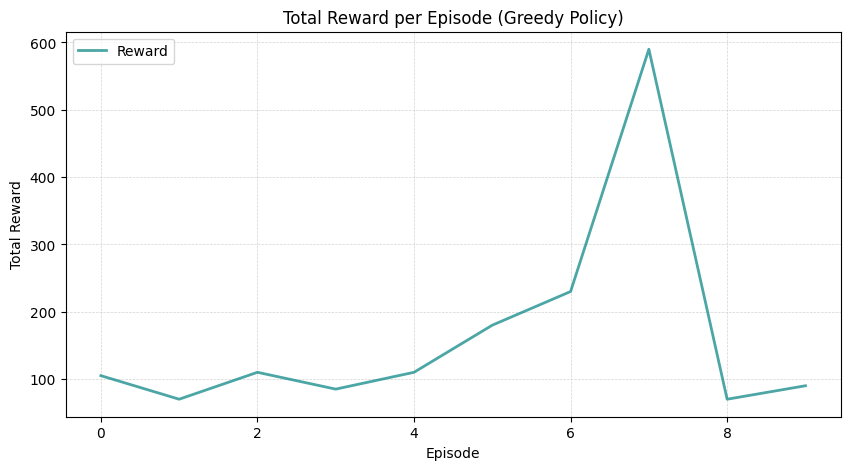

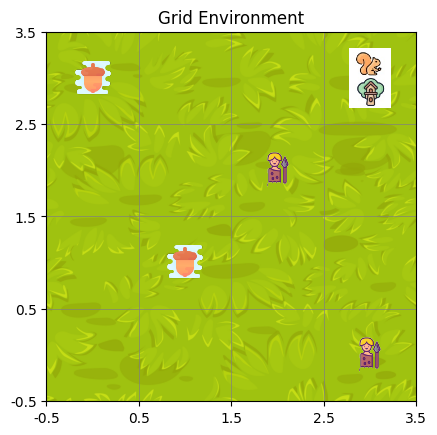

Requested Action: 1, Chosen Action: 2
Requested Action: 1, Chosen Action: 1
Requested Action: 2, Chosen Action: 2
Requested Action: 2, Chosen Action: 1
Requested Action: 2, Chosen Action: 2
Requested Action: 0, Chosen Action: 0
Requested Action: 1, Chosen Action: 2
Requested Action: 1, Chosen Action: 1
Requested Action: 3, Chosen Action: 2
Requested Action: 1, Chosen Action: 2
Requested Action: 1, Chosen Action: 1
Requested Action: 1, Chosen Action: 3
Requested Action: 1, Chosen Action: 1
Requested Action: 0, Chosen Action: 0
Requested Action: 0, Chosen Action: 1
Requested Action: 3, Chosen Action: 3
Requested Action: 0, Chosen Action: 0
Requested Action: 1, Chosen Action: 2
Requested Action: 1, Chosen Action: 1
Requested Action: 3, Chosen Action: 3
Requested Action: 3, Chosen Action: 1
Requested Action: 2, Chosen Action: 2
Requested Action: 1, Chosen Action: 2
Requested Action: 0, Chosen Action: 3
Requested Action: 2, Chosen Action: 2
Requested Action: 3, Chosen Action: 3
Requested Ac

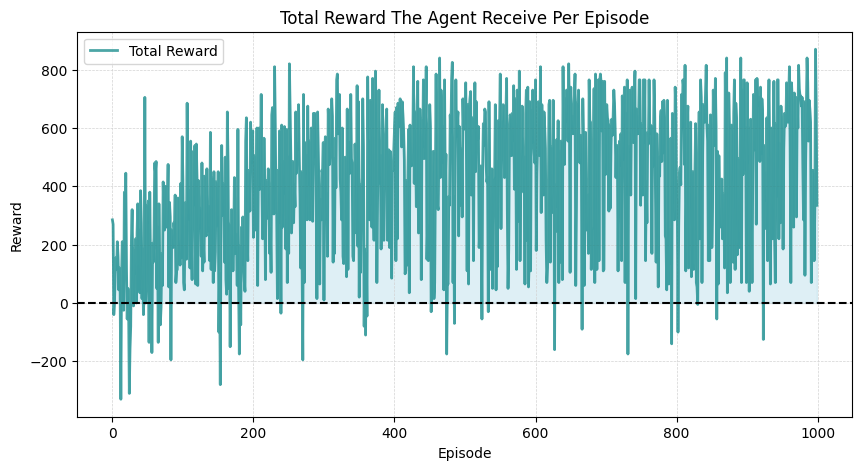

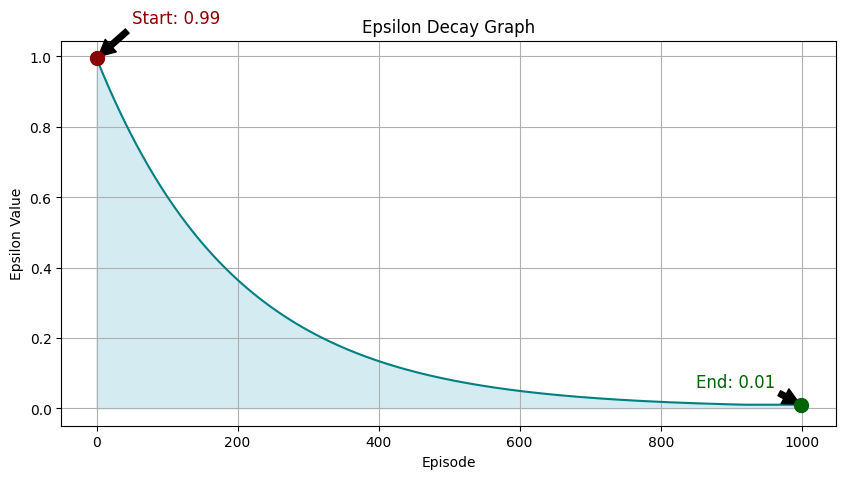

Requested Action: 2, Chosen Action: 1
Requested Action: 2, Chosen Action: 2
Requested Action: 0, Chosen Action: 2
Requested Action: 2, Chosen Action: 1
Requested Action: 2, Chosen Action: 1
Requested Action: 2, Chosen Action: 2
Requested Action: 2, Chosen Action: 2
Requested Action: 2, Chosen Action: 2
Requested Action: 2, Chosen Action: 3
Requested Action: 2, Chosen Action: 2
Requested Action: 2, Chosen Action: 2
Requested Action: 2, Chosen Action: 2
Requested Action: 2, Chosen Action: 2
Requested Action: 2, Chosen Action: 2
Requested Action: 2, Chosen Action: 2
Requested Action: 2, Chosen Action: 2
Requested Action: 2, Chosen Action: 0
Requested Action: 1, Chosen Action: 1
Requested Action: 2, Chosen Action: 2
Requested Action: 2, Chosen Action: 2
Episode 1000 Reward: 645
Requested Action: 2, Chosen Action: 2
Requested Action: 0, Chosen Action: 0
Requested Action: 2, Chosen Action: 2
Requested Action: 3, Chosen Action: 3
Requested Action: 2, Chosen Action: 1
Requested Action: 0, Chos

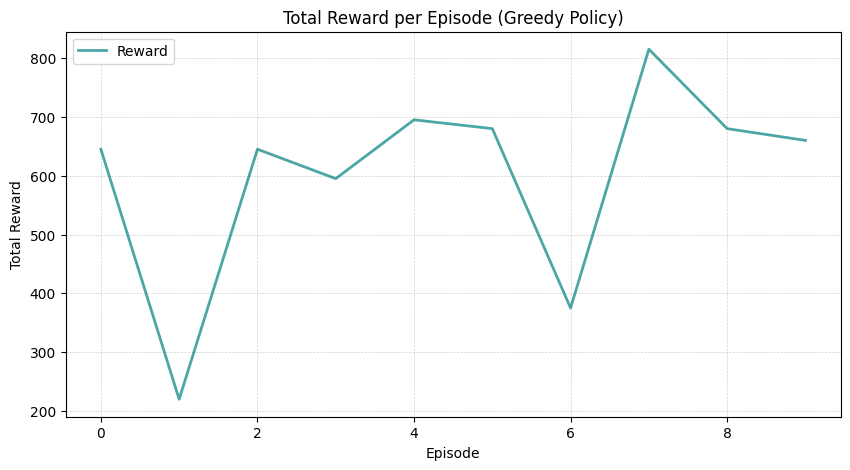

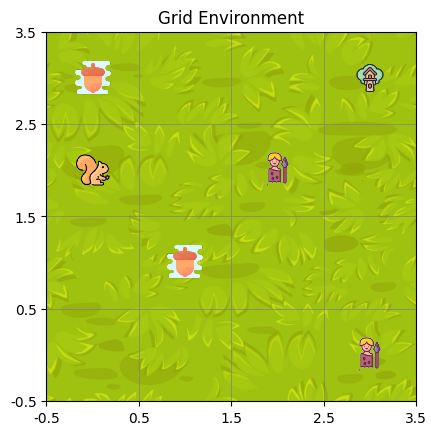

In [ ]:
max_timestamp_values = [12, 15, 20]
decay_val = [0.500, 0.750, 0.995]

for mt in max_timestamp_values:
    for decay in decay_val:
        env = SquirrelPet_stoch( alpha=0.15, max_timestamp=mt)
        qt, rewards_epi, epsilon_values, final_state = training_loop(env, decay, max_timestamp)
        evaluate_loop(env, mt, decay, qt, rewards_epi, epsilon_values, final_state)